# Exploratory Data Analysis using Python
## Uncleaned Bike Sales
The dataset consists of sales order information for various products across different countries and states for the month of December 2021.  
The dataset provides a snapshot of sales transactions, customer demographics, and product performance.   
Further analysis could involve examining trends in sales, profitability by product category, and customer behavior based on age group and gender.  
[Kaggle Data link]( https://www.kaggle.com/datasets/ratnarohith/uncleaned-bike-sales-data/data)  
   ## Columns Descriptions  
1. **Sales_Order**: A unique identifier assigned to each sales order.         
2. **Date**: The date when the sales order was placed.        
3. **Customer_Age**: The age of the customer who made the purchase.         
4. **Age_Group**: The categorized age group to which the customer belongs.      
5. **Customer_Gender**: The gender of the customer.      
5. **Country**: The country where the sales order originated.      
6. **State**: The specific state or region within the country where the sales order was placed.      
5. **Product_Category**: The broad category to which the product belongs, classifying it into a specific group.      
5. **Sub_Category**: The sub-category of the product, offering more detailed classification within the main product category.      
6. **Product_Description**: A descriptive text providing details about the specific product ordered.      
7. **Order_Quantity**: The number of units of the product included in the sales order, indicating the quantity purchased.     
8. **Unit_Cost**: The cost of producing or acquiring each unit of the product, influencing the profitability of the transaction.      
9. **Unit_Price**: The price at which each unit of the product is sold, determining the revenue generated per unit.      
10. **Profit**: The total profit earned from the sales order, calculated as the difference between revenue and cost.       
11. **Cost**: The total cost incurred for the products included in the sales order, influencing the overall profitability.      
12. **Revenue**: The total revenue generated from the sales order.    
       
 ## Questions answered
1. **Customer Demographics**  
   Insights about age, gender, and geographic distribution of customers.  

2. **Sales Performance**  
   Analysis of sales trends, daily sales patterns, and overall performance.  

3. **Product Performance**  
   Evaluation of the most and least popular bike types and colors and the most pofitable bike.  

4.  **Revenue and Profitability**  
    Examination of revenue generation, profit distribution, and performance by country.  

5. **Correlations and Relationships**  
Examining relationships between variables.

**Importing the necessary libraries**

In [515]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [2]:

df=pd.read_excel(r"C:\Users\Work Force\Desktop\uncleaned bike sales data.xlsx")
df.head()

,Sales_Order #,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,1.0,December,2021,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4.0,1252,2295,4172,5008,9180
1,261695,2021-12-01,1.0,December,2021,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1.0,1266,2320,1054,1266,2320
2,261697,2021-12-02,2.0,December,2021,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",2.0,420,769,698,840,1538
3,261698,2021-12-02,2.0,December,2021,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-400-W Silver, 42",1.0,420,769,349,420,769
4,261699,2021-12-03,3.0,December,2021,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2.0,0,2295,2086,0,4590


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Sales_Order #        89 non-null     int64         
 1   Date                 89 non-null     datetime64[ns]
 2   Day                  88 non-null     float64       
 3   Month                89 non-null     object        
 4   Year                 89 non-null     int64         
 5   Customer_Age         89 non-null     int64         
 6   Age_Group            88 non-null     object        
 7   Customer_Gender      89 non-null     object        
 8   Country              89 non-null     object        
 9   State                89 non-null     object        
 10  Product_Category     89 non-null     object        
 11  Sub_Category         89 non-null     object        
 12  Product_Description  88 non-null     object        
 13  Order_Quantity       88 non-null     

In [4]:
df.shape

(89, 19)

## Data cleaning

## 1. Renaming columns

In [7]:
#checking columns
df.columns

Index(['Sales_Order #', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', ' Unit_Cost ',
       ' Unit_Price ', ' Profit ', ' Cost ', 'Revenue'],
      dtype='object')

In [8]:
#renaming the sales order column
df2=df.rename(columns={'Sales_Order #':'Sales_order'})
df2.columns

Index(['Sales_order', 'Date', 'Day', 'Month', 'Year', 'Customer_Age',
       'Age_Group', 'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product_Description', 'Order_Quantity', ' Unit_Cost ',
       ' Unit_Price ', ' Profit ', ' Cost ', 'Revenue'],
      dtype='object')

## 2. Dealing with Null Values

In [10]:
# checking for mising and null values
df2.isnull().sum()

Sales_order            0
Date                   0
Day                    1
Month                  0
Year                   0
Customer_Age           0
Age_Group              1
Customer_Gender        0
Country                0
State                  0
Product_Category       0
Sub_Category           0
Product_Description    1
Order_Quantity         1
 Unit_Cost             0
 Unit_Price            0
 Profit                0
 Cost                  0
Revenue                0
dtype: int64

In [11]:
#lets filter the column to see where this null value is in age group
df2[df2['Age_Group'].isnull()]

,Sales_order,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
15,261709,2021-12-06,6.0,December,2021,36,NaN,M,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 42",1.0,1252,2295,1043,1252,2295


In [12]:
#filling the null value with its correspondent since 36 is in age bracket of 35-64
df2.Age_Group.fillna('Adults (35-64)',inplace=True)

In [13]:
# now lets check where the product description null value is
df2[df2['Product_Description'].isnull()]

,Sales_order,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
21,261715,2021-12-08,8.0,December,2021,39,Adults (35-64),F,United States,Oregon,Bikes,Mountain Bikes,NaN,2.0,1252,2295,2086,2504,4590


In [14]:
# since the product desecription column is a categorical data
#we shall fill it with mode
df2['Product_Description'].fillna(df2['Product_Description'].mode()[0],inplace=True)

In [15]:
df2[df2['Order_Quantity'].isnull()]

,Sales_order,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
22,261716,2021-12-08,8.0,December,2021,35,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-500 Black, 42",NaN,295,540,245,0,0


In [16]:
#we shall delete the null
df2.dropna(subset=['Order_Quantity'],inplace=True)

In [17]:
# since there's date column, no need of having
# month, day or year columns, lets delete
df2.drop(['Day', 'Month', 'Year'],axis=1,inplace=True)

## 3.Data types

In [19]:
df2.dtypes

Sales_order                     int64
Date                   datetime64[ns]
Customer_Age                    int64
Age_Group                      object
Customer_Gender                object
Country                        object
State                          object
Product_Category               object
Sub_Category                   object
Product_Description            object
Order_Quantity                float64
 Unit_Cost                      int64
 Unit_Price                     int64
 Profit                         int64
 Cost                           int64
Revenue                         int64
dtype: object

In [20]:
#Quantity can't be float, lets change the data type
df2['Order_Quantity']=df2['Order_Quantity'].astype(int)

## 4. Duplicates

In [22]:
df2[df2['Sales_order'].duplicated()==1]

,Sales_order,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1,261695,2021-12-01,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1,1266,2320,1054,1266,2320
7,261701,2021-12-03,37,Adults (35-64),M,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,1043,1252,2295


In [23]:
df2[df2.Sales_order.isin([261695,261701])]

,Sales_order,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product_Description,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,261695,2021-12-01,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,"Mountain-200 Black, 46",4,1252,2295,4172,5008,9180
1,261695,2021-12-01,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1,1266,2320,1054,1266,2320
6,261701,2021-12-03,37,Adults (35-64),M,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,1043,1252,2295
7,261701,2021-12-03,37,Adults (35-64),M,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,1043,1252,2295


In [24]:
# dropping the duplicates
df2.loc[1, 'Sales_order']=261696

In [25]:
df2.iloc[6] == df2.iloc[7]

Sales_order             True
Date                    True
Customer_Age            True
Age_Group               True
Customer_Gender         True
Country                False
State                   True
Product_Category        True
Sub_Category            True
Product_Description     True
Order_Quantity          True
 Unit_Cost              True
 Unit_Price             True
 Profit                 True
 Cost                   True
Revenue                 True
dtype: bool

In [174]:
df2 = df2.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
# splitting and dropping columns

In [176]:
df2.drop_duplicates(inplace=True)

In [58]:
df2['Product_type']=df2.Product_Description.str.split(pat=' ').str[0]

In [77]:
split_columns=df2.Product_Description.str.split(pat=' ',expand=True)

In [79]:
df2['Color'] = split_columns[1].str.replace(',', '') 

In [81]:
df2['Size'] = split_columns[2] 

In [89]:
df2.drop(['Product_Description'],axis=1, inplace=True)

In [105]:
df2.set_index('Sales_order',inplace=True)

In [107]:
df2.head()

,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Product_type,Color,Size
Sales_order,,,,,,,,,,,,,,,,,
261695,2021-12-01,39,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,4,1252,2295,4172,5008,9180,Mountain-200,Black,46
261696,2021-12-01,44,Adults (35-64),M,United Kingdom,England,Bikes,Mountain Bikes,1,1266,2320,1054,1266,2320,Mountain-200,Silver,42
261697,2021-12-02,37,Adults (35-64),M,United States,California,Bikes,Mountain Bikes,2,420,769,698,840,1538,Mountain-400-W,Silver,46
261698,2021-12-02,31,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,1,420,769,349,420,769,Mountain-400-W,Silver,42
261699,2021-12-03,37,Adults (35-64),F,United States,California,Bikes,Mountain Bikes,2,0,2295,2086,0,4590,Mountain-200,Black,46


In [116]:
#lets replace customer gender to male and female using a dictionary
df2['Customer_Gender'].replace({'F':'Female','M':'Male'})

Sales_order
261695    Female
261696      Male
261697      Male
261698    Female
261699    Female
           ...  
261778      Male
261779    Female
261780    Female
261781    Female
261782      Male
Name: Customer_Gender, Length: 87, dtype: object

In [118]:
df2.Customer_Gender=df2['Customer_Gender'].replace({'F':'Female','M':'Male'})

In [182]:
df2.Country.unique()

array(['United States', 'United Kingdom', 'Australia', 'United  States',
       'Germany', 'Canada', 'France'], dtype=object)

In [184]:
df2.loc[261699,'Country']= 'United States'

In [241]:
#calculating cost,unit cost,unit price and revenue with 0 value

In [224]:
df2.loc[261699,'Cost']=df2.loc[261699,'Revenue']-df2.loc[261699,'Profit']

In [228]:
df2.loc[261699,'Unit_Cost']=df2.loc[261699,'Cost']/df2.loc[261699,'Order_Quantity']

In [232]:
df2.loc[261702,'Revenue']=df2.loc[261702,'Profit']+df2.loc[261702,'Cost']

In [234]:
df2.loc[261702,'Unit_Price']=df2.loc[261702,'Revenue']/df2.loc[261702,'Order_Quantity']

In [220]:
df2.rename(columns ={' Unit_Cost ':'Unit_Cost', ' Unit_Price ':'Unit_Price', ' Profit ': 'Profit', ' Cost ':'Cost'},inplace=True)


## Data analysis and Visualization

In [350]:
df2['Date'] = pd.to_datetime(df2['Date']).dt.date

In [417]:
df2.describe()

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,34.160920,2.137931,1073.045977,1961.816092,1876.586207,2269.298851,4145.885057
std,8.178067,1.240521,422.577663,765.498280,1396.900835,1713.738862,3109.958552
min,17.000000,1.000000,295.000000,540.000000,245.000000,295.000000,540.000000
25%,29.500000,1.000000,1252.000000,2295.000000,1043.000000,1252.000000,2295.000000
50%,35.000000,2.000000,1252.000000,2295.000000,1054.000000,1266.000000,2320.000000
75%,38.000000,3.000000,1266.000000,2320.000000,3041.500000,3756.000000,6817.500000
max,63.000000,4.000000,1912.000000,3400.000000,5908.000000,7592.000000,13500.000000


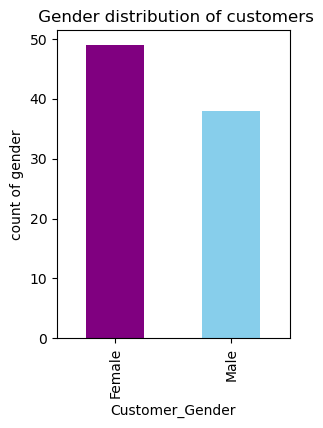

In [419]:
gender=df2.groupby(['Customer_Gender'])['Customer_Gender'].count()
plt.figure(figsize=(3,4))
colors=['purple','skyblue']
gender.plot.bar(ylabel='count of gender',color=colors)
plt.title(' Gender distribution of customers')
plt.show()              

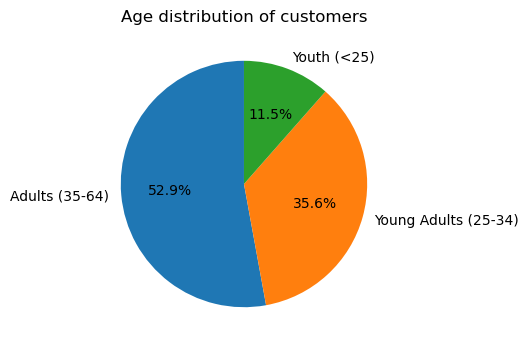

In [421]:
age=df2.groupby(['Age_Group'])['Age_Group'].count()
plt.figure(figsize=(4,4))
plt.pie(age,
        labels=age.index,
             autopct='%1.1f%%',
             startangle=90, )
plt.title('Age distribution of customers')
plt.show()


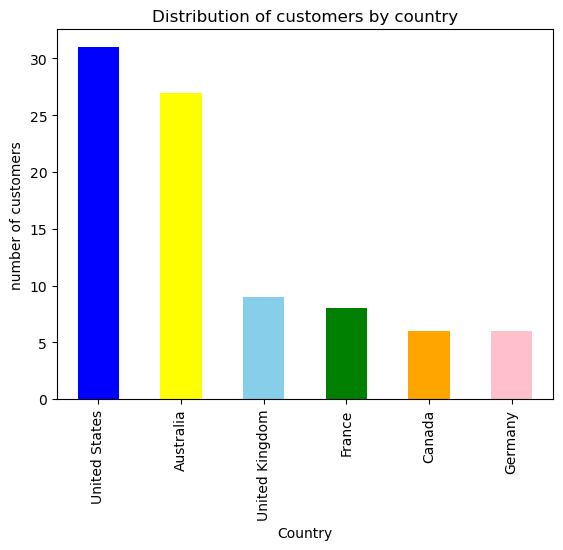

In [337]:
country_dist=df2.groupby(['Country'])['Country'].count()
country_dist_sorted=country_dist.sort_values(ascending=False)
colors=['blue','yellow','skyblue','green','orange','pink']

country_dist_sorted.plot(kind='bar',
                         ylabel='number of customers',
                        color=colors)
plt.title('Distribution of customers by country')
plt.show()

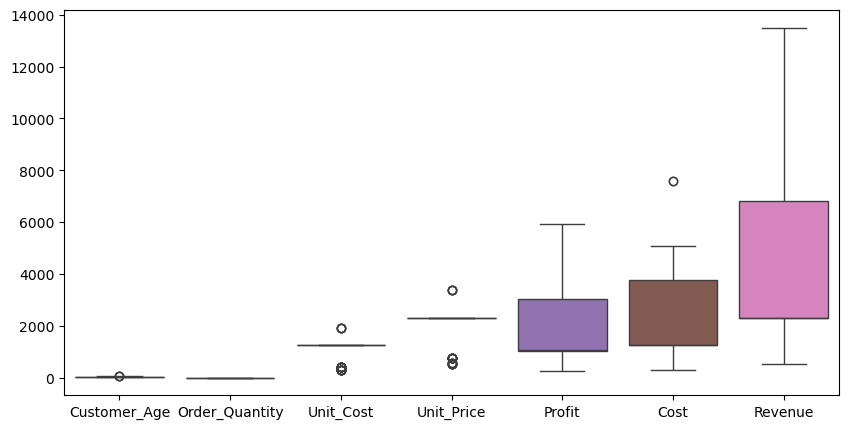

In [533]:
plt.figure(figsize=(10,5))
sns.boxplot( data=df2)
plt.show()

Customer Age and Order Quantity:  

Both variables have tightly clustered distributions, indicating consistency.   
No significant outliers were observed, suggesting stable customer demographics and order patterns. 

Unit Cost and Unit Price:  

These variables have similar distributions, with a few outliers indicating occasional deviations in pricing or cost.   
The consistency aligns with the strong correlation between the two.  
 
Profit and Cost:  

Both show moderate variability, with a few outliers representing high-cost or high-profit transactions.   
This variability may be driven by larger or more expensive orders.  

Revenue:

Revenue exhibits the widest distribution.

In [423]:
#calculating the total quantity of bikes sold
print('Total number of bikes sold is')
print(df2['Order_Quantity'].sum(), 'bikes')


Total number of bikes sold is
186 bikes


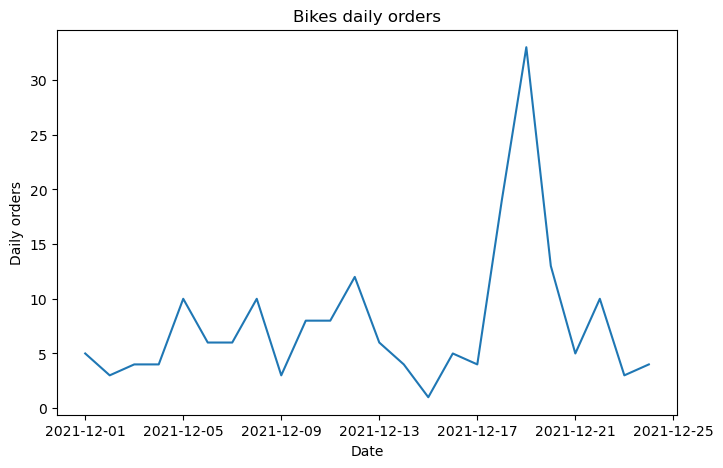

In [572]:
Daily_order_quantity=df2.groupby(['Date'])['Order_Quantity'].sum()
plt.figure(figsize=(8,5))
Daily_order_quantity.plot(kind='line',ylabel='Daily orders')
plt.title('Bikes daily orders')
plt.show()

In [492]:
#total revenue
print('Total revenue generated is')
print( df2.Revenue.sum(), 'dollars')

Total revenue generated is
360692 dollars


In [497]:
#total profit made
print('Total profit generated is')
print( df2.Profit.sum(), 'dollars')

Total profit generated is
163263 dollars


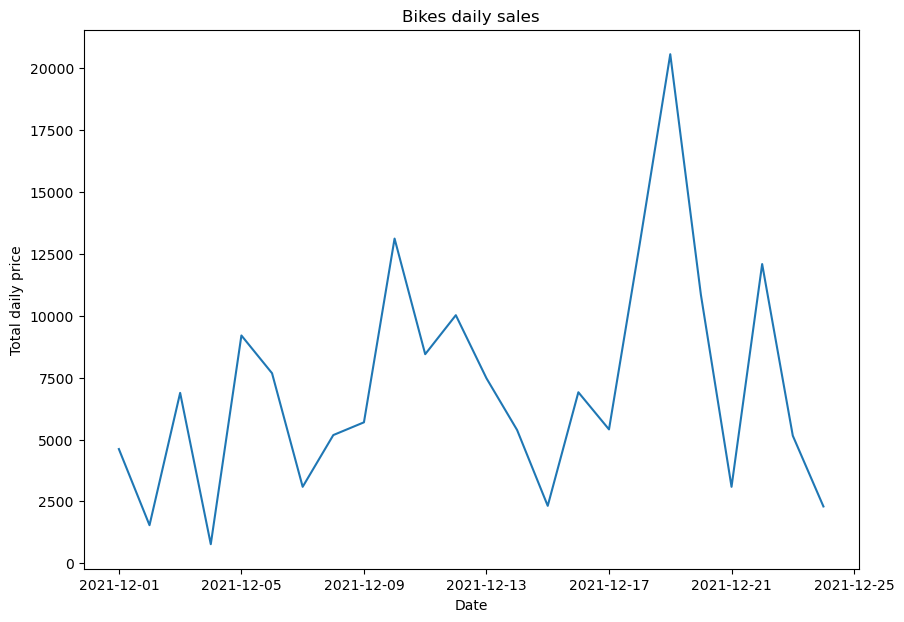

In [425]:
# sales by date
days_sales=df2.groupby(['Date'])['Unit_Price'].sum()
plt.figure(figsize=(10,7))
days_sales.plot(kind='line', ylabel='Total daily price')
plt.title('Bikes daily sales')
plt.show()

The daily bike sales over the observed period exhibit significant fluctuations, with notable peaks and troughs.   
The **highest** sales day was around **December 19**, where total daily sales exceeded **20,000**.   
There are multiple **low-sales** days, particularly around **December 2, December 4, December 15 and December 24**, with totals dropping **below 2,500**.  
No consistent trend is observed

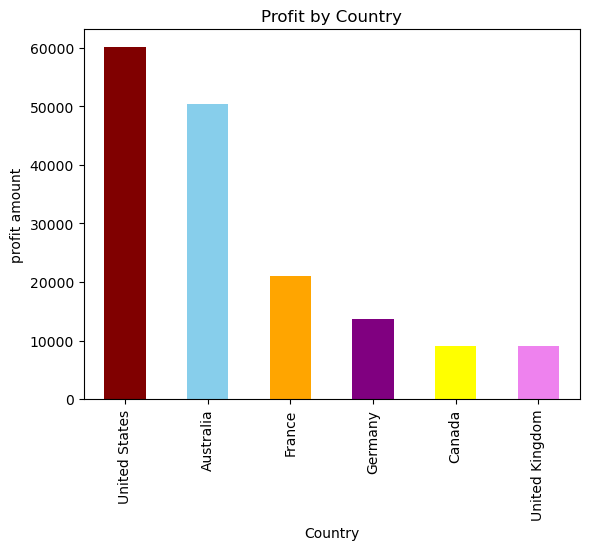

In [455]:
# profit by country
Country_profit=df2.groupby(['Country'])['Profit'].sum()
Country_profit.sort_values(ascending=False,inplace =True)
colors=['maroon','skyblue','orange','purple','yellow','violet']
Country_profit.plot(kind='bar',ylabel='profit amount',color=colors)
plt.title('Profit by Country')

plt.show()


**Profit Analysis by Country**

1. **United States** leads in profit, generating over **60,000**.
2. **United Kingdom** has the **lowest** profit among the listed countries of less than **10,0000**.
3. **Australia** ranks second in profits, showing significant contributions.
4. France, Germany, and Canada fall in the middle range, with profits ranging between 10,000 and 30,000.




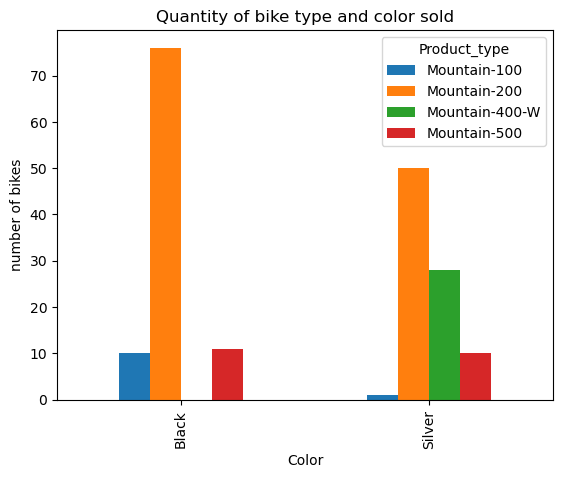

In [486]:
#the most ordered bike type
bikes=df2.groupby(['Product_type','Color'])['Order_Quantity'].sum().reset_index()
bikes_pivot = bikes.pivot(index='Color', columns='Product_type', values='Order_Quantity')
bikes_pivot.plot(kind='bar',ylabel='number of bikes')
plt.title('Quantity of bike type and color sold')
plt.show()



The most sold bikes was mountain-200 black with more than 70 bikes being sold.  
Mountain-100 both black and silver, were the less sold bikes.  
Mountain-200, either black or silver, was the one with the highest demand.

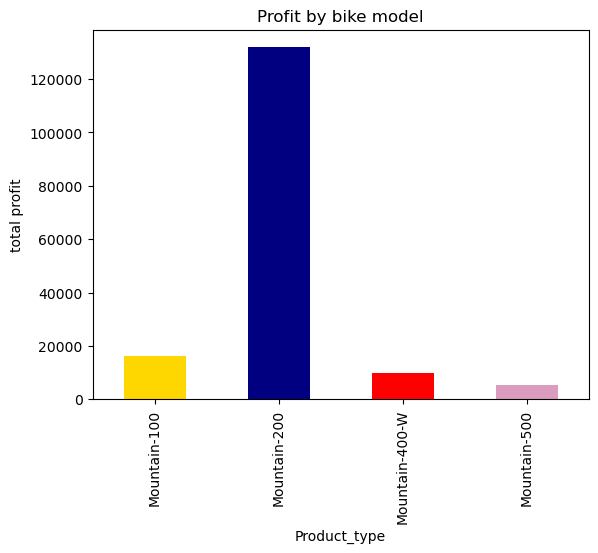

In [586]:
#profit by bike type
Product_profit=df2.groupby(['Product_type'])['Profit'].sum()
colors=['gold','navy','red','#dc9cbf']
Product_profit.plot(kind='bar',ylabel='total profit',color=colors)
plt.title('Profit by bike model')
plt.show()

The most profitable bike model is Mountain-200 with a profit of above 120,000 dollars.  

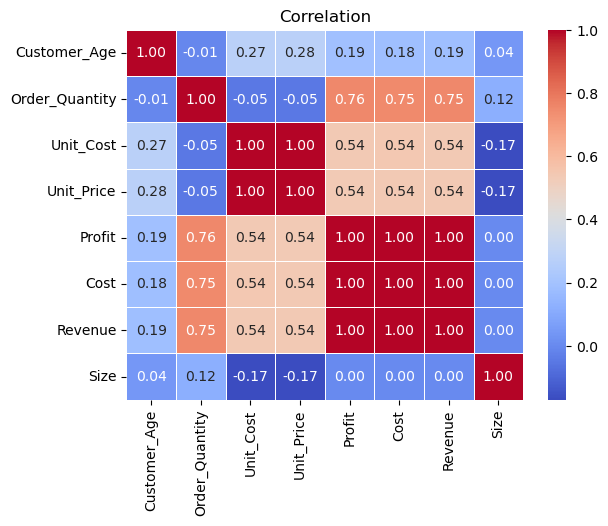

In [538]:
correlations=df2[ ['Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue',  'Size']]
correlation=correlations.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation')
plt.show()

Summary of key insights from the correlation matrix  

**Strong Positive Correlations**:  

1. **Profit, Cost**, and **Revenue** are highly correlated with each other (correlation ≈ 1.00).  
   This indicates that higher profits is directly associated with higher costs and revenues.  
2. **Order Quantity** shows a **strong positive correlation** with **Profit (0.76), Cost (0.75)**, and **Revenue (0.75)**.  
   This implies that larger orders significantly impact profitability and revenue.  

Unit Cost and Unit Price have a perfect correlation (1.00), indicating that the unit cost and unit price are strongly interlinked, potentially due to a pricing strategy tied directly to costs.  
Low or No Correlations:  

Size shows weak or no correlation with most variables, suggesting that product size doesn’t significantly influence profitability, costs, or customer age.

## Summary

**Majority** of customers are **female (56.32%)** and 43.68% of the customers are male.  
Customer **age** ranges from **17 to 63** years with a **mean** of **34** years.  
Majority of the cutomers are aged between **35 to 63 years (52.9%)**.  
**United States** is the leading country with at least **30 customers** while **Germany** has **less than 10** customers.    
The **quantity of bikes** ordered ranges between **1 and 4** bikes.  
The total number of bikes sold were **186 bikes**.     
**December 19** was the  day with the highest orders of **33** bikes while December 15 had only 1 order.  
Total **revenue** generated from the bike sales was **360,692** dollars.  
The total **profit** made from the sales of bikes was **163,263** dollars.  






